# EEG Semiology Analysis
This script is dedicated to the analysis of EEG data, focusing on the identification and analysis of specific EEG patterns and events, such as spikes and laughter segments. The analysis pipeline includes data loading, preprocessing, spike detection, and event-related synchronization (ERS) analysis.

## Importing Necessary Libraries
Here we import the necessary Python libraries for handling EEG data, numerical operations, and utility functions for analysis.



In [1]:
import mne
import numpy as np
import EEG_Analysis_Utility_Functions as eeg_util


## Data Paths Configuration
Setting up the paths to the EEG data files and processed data files for both the main analysis and the laughter segment analysis.



In [2]:
source_edf_path = '<path_to_your_source_edf_file>'  # Path to the original EDF file
target_h5_path = '<path_to_your_target_h5_file>'  # Path for the processed H5 file to be created


## Loading and Preprocessing EEG Data
Loading the EEG data from EDF files, cropping the data to remove the last second, and defining the chunk size for parallel processing.



In [3]:
raw_edf = mne.io.read_raw_edf(source_edf_path, preload=False)
raw_edf.crop(tmax=raw_edf.times[-1] - 1)

raw_data, raw_times = raw_edf[:, :]
channel_list = raw_edf.ch_names
eeg_annotations = raw_edf.annotations


# Calculate chunk size for parallel processing
chunk_size = len(raw_times) // 10 # Adjust chunk size if necessary for computational constraints

# Display channel names for verification
eeg_util.displayChannelNames(raw_edf)


Extracting EDF parameters from e:\KFSH_Internship\_projects\diff_projects\semiology\sz4_5&7_8\laugh_3\bipolar_10s_buffer_laugh_3_data.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Channel 0: A1-A2
Channel 1: A2-A3
Channel 2: A3-A4
Channel 3: A4-A5
Channel 4: A5-A6
Channel 5: A6-A7
Channel 6: A7-A8
Channel 7: A8-A9
Channel 8: R1-R2
Channel 9: R2-R3
Channel 10: R3-R4
Channel 11: R4-R5
Channel 12: R5-R6
Channel 13: R6-R7
Channel 14: R7-R8
Channel 15: R8-R9
Channel 16: R9-R10
Channel 17: Q1-Q2
Channel 18: Q2-Q3
Channel 19: Q3-Q4
Channel 20: Q4-Q5
Channel 21: Q5-Q6
Channel 22: Q6-Q7
Channel 23: SR/L1-SR/L2
Channel 24: SR/L2-SR/L3
Channel 25: SR/L3-SR/L4
Channel 26: SR/L4-SR/L5
Channel 27: SR/L5-SR/L6
Channel 28: SR/L6-SR/L7
Channel 29: SR/L7-SR/L8
Channel 30: SR/L8-SR/L9
Channel 31: SR/L9-SR/L10
Channel 32: SR/L10-SR/L11
Channel 33: SR/L11-SR/L12
Channel 34: SR/L12-SR/L13
Channel 35: SR/L13-SR/L14
Channel 36: SR/L14-SR/L15
Channel 37: SR/L15-SR/L1

## Parallel Processing of EEG Data
Processing the EEG data in chunks in parallel to apply notch filtering, bandpass filtering, and Hilbert transform.



In [4]:
eeg_util.processEEGDataInChunksParallel(raw_edf, target_h5_path, chunk_size)

notch_filtered_data, bandpass_filtered_data, hilbert_transformed_data = eeg_util.readProcessedEEGData(target_h5_path)


e:\KFSH_Internship\_projects\diff_projects\semiology\EEG_Analysis_Utility_Functions.py:206: RuntimeWarning: filter_length (6601) is longer than the signal (2000), distortion is likely. Reduce filter length or filter a longer signal.
  notch_filtered = raw_chunk.copy().notch_filter(notch_freqs, method='fir', fir_design='firwin', verbose=False).get_data().astype(np.float32)
e:\KFSH_Internship\_projects\diff_projects\semiology\EEG_Analysis_Utility_Functions.py:206: RuntimeWarning: filter_length (6601) is longer than the signal (2000), distortion is likely. Reduce filter length or filter a longer signal.
  notch_filtered = raw_chunk.copy().notch_filter(notch_freqs, method='fir', fir_design='firwin', verbose=False).get_data().astype(np.float32)
e:\KFSH_Internship\_projects\diff_projects\semiology\EEG_Analysis_Utility_Functions.py:206: RuntimeWarning: filter_length (6601) is longer than the signal (2000), distortion is likely. Reduce filter length or filter a longer signal.
  notch_filtered 

Creating RawArray with float64 data, n_channels=157, n_times=2000
    Range : 0 ... 1999 =      0.000 ...     1.999 secs
Ready.


e:\KFSH_Internship\_projects\diff_projects\semiology\EEG_Analysis_Utility_Functions.py:206: RuntimeWarning: filter_length (6601) is longer than the signal (2000), distortion is likely. Reduce filter length or filter a longer signal.
  notch_filtered = raw_chunk.copy().notch_filter(notch_freqs, method='fir', fir_design='firwin', verbose=False).get_data().astype(np.float32)
e:\KFSH_Internship\_projects\diff_projects\semiology\EEG_Analysis_Utility_Functions.py:206: RuntimeWarning: filter_length (6601) is longer than the signal (2000), distortion is likely. Reduce filter length or filter a longer signal.
  notch_filtered = raw_chunk.copy().notch_filter(notch_freqs, method='fir', fir_design='firwin', verbose=False).get_data().astype(np.float32)
e:\KFSH_Internship\_projects\diff_projects\semiology\EEG_Analysis_Utility_Functions.py:206: RuntimeWarning: filter_length (6601) is longer than the signal (2000), distortion is likely. Reduce filter length or filter a longer signal.
  notch_filtered 

## Visualization of Processed EEG Data

This section demonstrates the visualization of both original and processed EEG data for a chosen channel, highlighting the impact of each preprocessing phase.

### Evaluating Notch Filter Performance through Frequency Domain Analysis

Note: Analyzing the signal in the frequency domain is crucial for evaluating the performance of a notch filter.

- **X-axis:** Frequency in Hertz (Hz)
- **Y-axis:** Signal Magnitude or Power

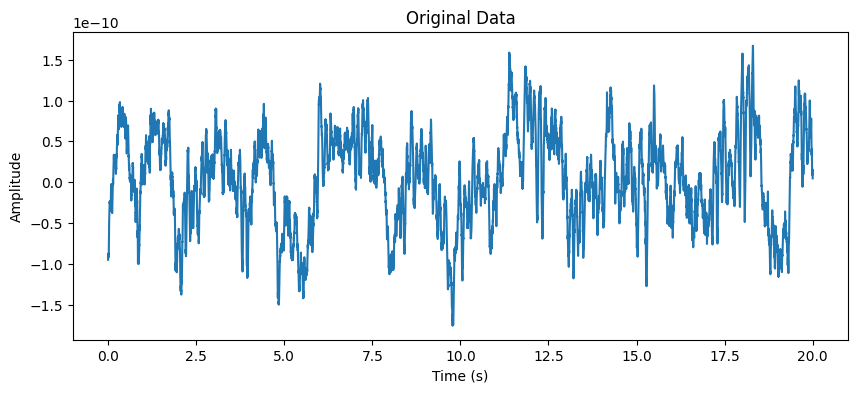

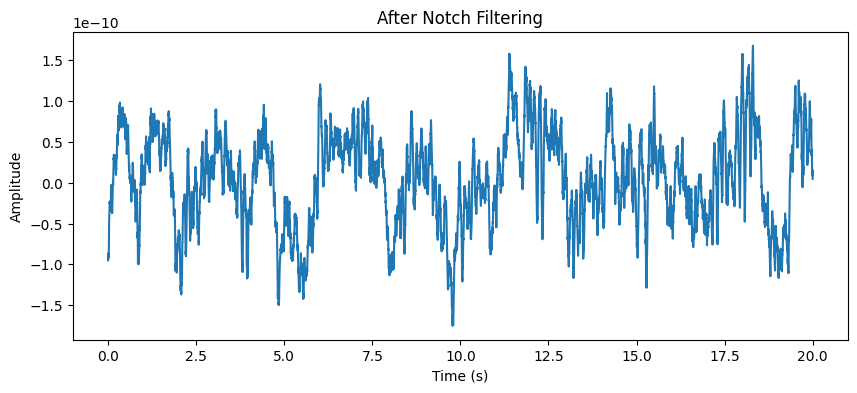

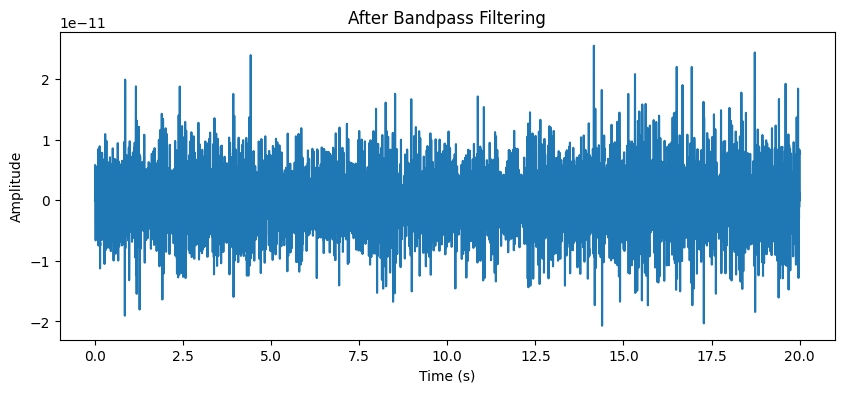

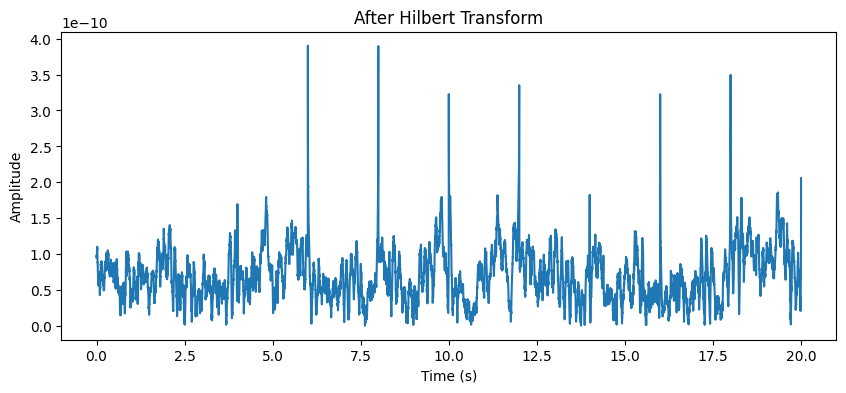

In [5]:
display_channel = 8  # Channel number for display
display_start = 0  # Start time in seconds
display_end = 40  # End time in seconds

eeg_util.plotEEGData(raw_data, raw_times, 'Original Data', channel_index=display_channel, start_time=display_start, end_time=display_end)
eeg_util.plotEEGData(notch_filtered_data, raw_times, 'After Notch Filtering', channel_index=display_channel, start_time=display_start, end_time=display_end)
eeg_util.plotEEGData(bandpass_filtered_data, raw_times, 'After Bandpass Filtering', channel_index=display_channel, start_time=display_start, end_time=display_end)
eeg_util.plotEEGData(hilbert_transformed_data, raw_times, 'After Hilbert Transform', channel_index=display_channel, start_time=display_start, end_time=display_end)


## Spike Detection
Applying spike detection using the Median Absolute Deviation (MAD) method to all channels in parallel and visualizing the detection results for selected channels.


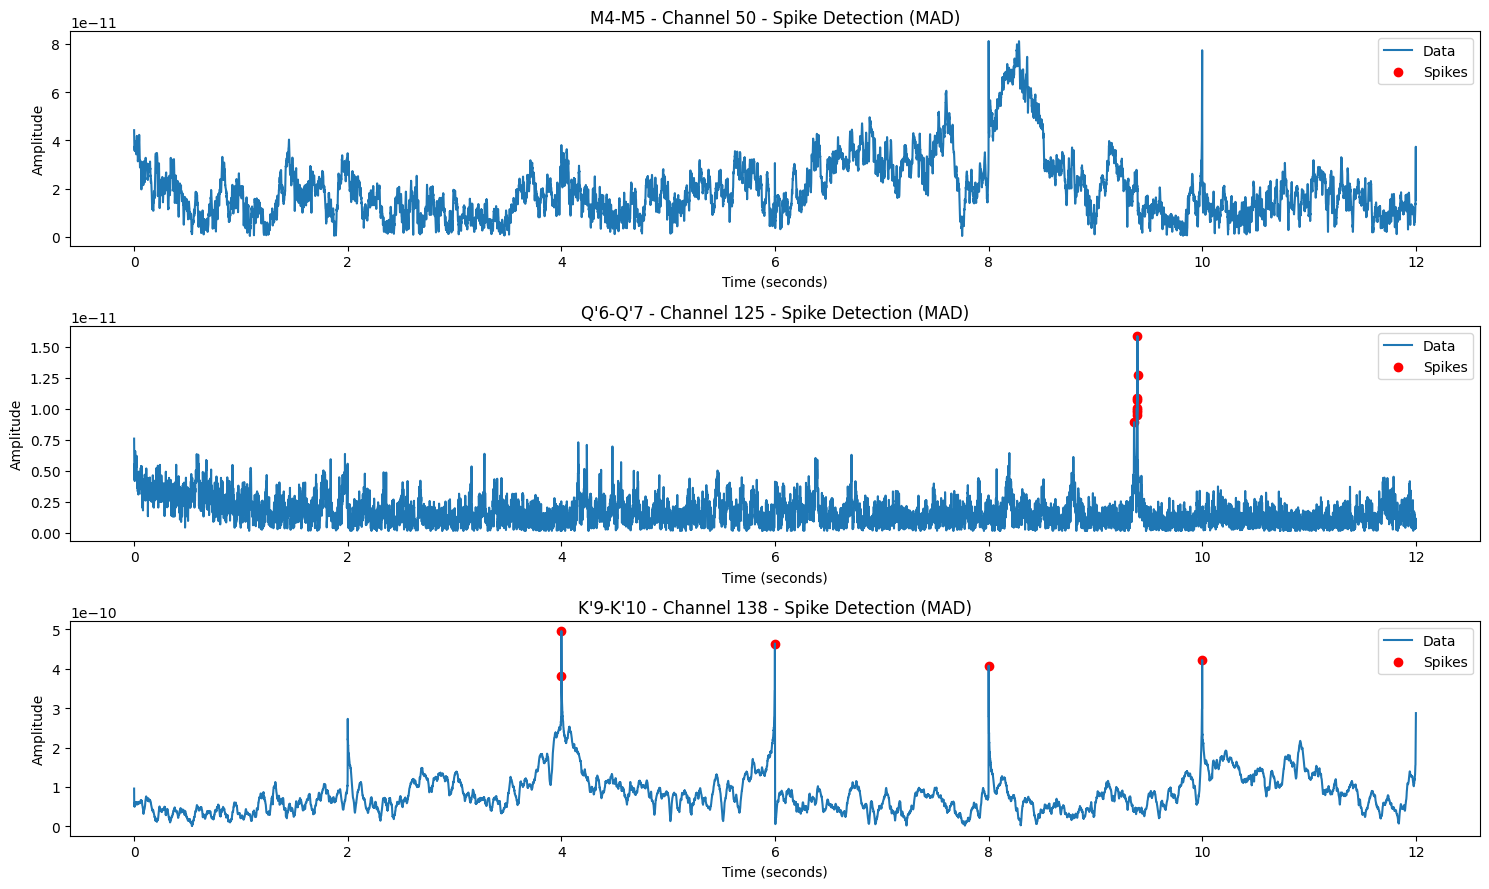

In [6]:
detected_spikes = eeg_util.detectSpikesParallel(hilbert_transformed_data)

plot_channels = [50, 125, 138] # Channel number for display
plot_start = 0  # Start time in seconds
plot_end = 12  # End time in seconds

eeg_util.plotSpikeDetectionResults(hilbert_transformed_data, raw_times, detected_spikes, plot_channels, channel_list, plot_start, plot_end)


## Baseline and Segment Calculation
Calculating baselines and segments for all channels to prepare for further analysis, such as ERS calculation.



In [7]:
baselines, segment_info = eeg_util.calculateBaselinesAndSegmentsForAllChannels(hilbert_transformed_data, raw_times, eeg_annotations, detected_spikes, duration=10, num_segments=30, min_segment_gap=1, max_attempts=50)

eeg_util.reportChannelsWithSegmentIssues(segment_info, raw_times, expected_num_segments=30)


Processing Channel 0 with 22 spikes...
Channel 0: Maximum attempts reached (50). Stopping search for this channel.
Retrying Channel 0 with adjusted parameters (attempt 1)...
Channel 0: Maximum attempts reached (55). Stopping search for this channel.
Retrying Channel 0 with adjusted parameters (attempt 2)...
Channel 0: Maximum attempts reached (60). Stopping search for this channel.
Retrying Channel 0 with adjusted parameters (attempt 3)...
Channel 0: Maximum attempts reached (66). Stopping search for this channel.
Retrying Channel 0 with adjusted parameters (attempt 4)...
Channel 0: Maximum attempts reached (72). Stopping search for this channel.
Retrying Channel 0 with adjusted parameters (attempt 5)...
Channel 0: Maximum retries reached (5). Setting duration to zero and returning last result.
Processing Channel 1 with 0 spikes...
Retrying Channel 1 with adjusted parameters (attempt 1)...
Retrying Channel 1 with adjusted parameters (attempt 2)...
Retrying Channel 1 with adjusted param

## Laughter Segment Analysis
Processing and analyzing laughter segments to study event-related synchronization (ERS) and performing statistical tests on the results.



In [8]:
# Load and process laughter segment data
laugh_source_edf_path = '<path_to_your_laughter_segment_edf_file>'
laugh_target_h5_path = '<path_to_your_processed_laughter_segment_h5_file>'

laugh_raw_edf = mne.io.read_raw_edf(laugh_source_edf_path, preload=False)
laugh_raw_edf.crop(tmax=laugh_raw_edf.times[-1] - 1)

eeg_util.processEEGDataInChunksParallel(laugh_raw_edf, laugh_target_h5_path, chunk_size)

_, _, laugh_hilbert_data = eeg_util.readProcessedEEGData(laugh_target_h5_path)

# ERS calculation and normalization
ERS_values_percentage = eeg_util.calculateERSPercentageForAllChannels(laugh_hilbert_data, baselines)
ERS_values = np.array(list(ERS_values_percentage.values()))
normalized_ERS = eeg_util.normalizeDataParallel(ERS_values)

# Selecting top channels and performing t-test
top_channels = eeg_util.selectTopEEGChannels(normalized_ERS)
t_stat, p_val = eeg_util.performTTestOnChannelMeans(normalized_ERS[top_channels])

print(top_channels)
print("P-value < 0.05:", p_val < 0.05)


e:\KFSH_Internship\_projects\diff_projects\semiology\EEG_Analysis_Utility_Functions.py:206: RuntimeWarning: filter_length (6601) is longer than the signal (2000), distortion is likely. Reduce filter length or filter a longer signal.
  notch_filtered = raw_chunk.copy().notch_filter(notch_freqs, method='fir', fir_design='firwin', verbose=False).get_data().astype(np.float32)
e:\KFSH_Internship\_projects\diff_projects\semiology\EEG_Analysis_Utility_Functions.py:206: RuntimeWarning: filter_length (6601) is longer than the signal (2000), distortion is likely. Reduce filter length or filter a longer signal.
  notch_filtered = raw_chunk.copy().notch_filter(notch_freqs, method='fir', fir_design='firwin', verbose=False).get_data().astype(np.float32)
e:\KFSH_Internship\_projects\diff_projects\semiology\EEG_Analysis_Utility_Functions.py:206: RuntimeWarning: filter_length (6601) is longer than the signal (2000), distortion is likely. Reduce filter length or filter a longer signal.
  notch_filtered 

[ 37  53  69  34  33  31  29  24  19   8  46 116 115  70  71  73  81  89
  90  91  92  93  94  95 101 103 107 108 110 114 156]
P-value < 0.05: False
